In [1]:
import tensorflow as tf

# Define the U-Net model architecture
def unet_model(input_shape):
    """model: https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/"""
    # Encoder
    inputs = tf.keras.layers.Input(shape=input_shape)
    print(inputs.shape)
    inputs_padded = tf.keras.layers.ZeroPadding2D(((0,2888), (0,0)))( inputs )
    print(inputs_padded.shape)

    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs_padded)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)

    
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)
    
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    print("pool3", pool3.shape)

    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    print("pool4", pool4.shape)

    # lowest layer
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv4)
    pool5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop5)
    print("pool5", pool5.shape)

    # Decoder
    up1 = tf.keras.layers.Conv2DTranspose(1024, 2, strides=(2, 2), padding='same')(pool5)
    merge1 = tf.keras.layers.concatenate([drop5, up1], axis=3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(merge1)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up2 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv6)
    merge2 = tf.keras.layers.concatenate([conv3, up2], axis=3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(merge2)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up3 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv7)
    merge3 = tf.keras.layers.concatenate([conv2, up3], axis=3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(merge3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up4 = tf.keras.layers.Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv8)
    merge4 = tf.keras.layers.concatenate([conv1, up4], axis=3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(merge4)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    print("conv9", conv9.shape)


    # Output
    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv9)
#     outputs_unpadded = tf.keras.layers.ZeroPadding2D(((0,-2888), (0,0)))( inputs )
    outputs_unpadded = tf.keras.layers.Cropping2D(cropping=((0, 2888), (0, 0)))(outputs) # todo check if legit

#     outputs = tf.keras.layers.Conv2D(1, 1, activation="softmax", padding="same")(conv8)

    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs_unpadded)
    
    return model

2023-04-10 00:32:56.109466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
my_model = unet_model(input_shape=(1208, 1920, 3))

(None, 1208, 1920, 3)
(None, 4096, 1920, 3)
(None, 2048, 960, 64)
(None, 1024, 480, 128)
pool3 (None, 512, 240, 256)
pool4 (None, 256, 120, 512)


2023-04-10 00:33:03.071066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


pool5 (None, 256, 120, 512)
conv9 (None, 4096, 1920, 64)


In [3]:
my_model.output_shape

(None, 1208, 1920, 1)

In [4]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1208, 1920,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 4096, 1920,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 4096, 1920,   1792        ['zero_padding2d[0][0]']         
                                64)                                                           

                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 4096, 1920,   16416      ['conv2d_15[0][0]']              
 spose)                         32)                                                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 4096, 1920,   0           ['conv2d_1[0][0]',               
                                96)                               'conv2d_transpose_3[0][0]']     
                                                                                                  
 conv2d_16 (Conv2D)             (None, 4096, 1920,   55360       ['concatenate_3[0][0]']          
                                64)                                                               
                                                                                                  
 conv2d_17

In [5]:
import os
import tarfile
from PIL import Image
import numpy

def read_data(tar_file: str):
    """
    Reads all images from a single scene in the A2D2 dataset.

    Parameters:
    scene_dir (str): Path to the directory containing the tar file for the scene.

    Returns:
    A list of PIL Image objects, each corresponding to an image in the scene.
    """

    # Open the tar file and read the images
    images = []
    with tarfile.open(tar_file) as tf:
        for member in tf.getmembers():
            if member.isfile() and member.name.endswith('.png'):
                f = tf.extractfile(member)
                image = np.array(Image.open(f))
                images.append(image)

    return images

In [6]:
image = numpy.array(Image.open("../data/sample_data/20180807145028_camera_frontcenter_000006882.png"))
label = numpy.array(Image.open("../data/sample_data/20180807145028_label_frontcenter_000006882.png"))

In [7]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

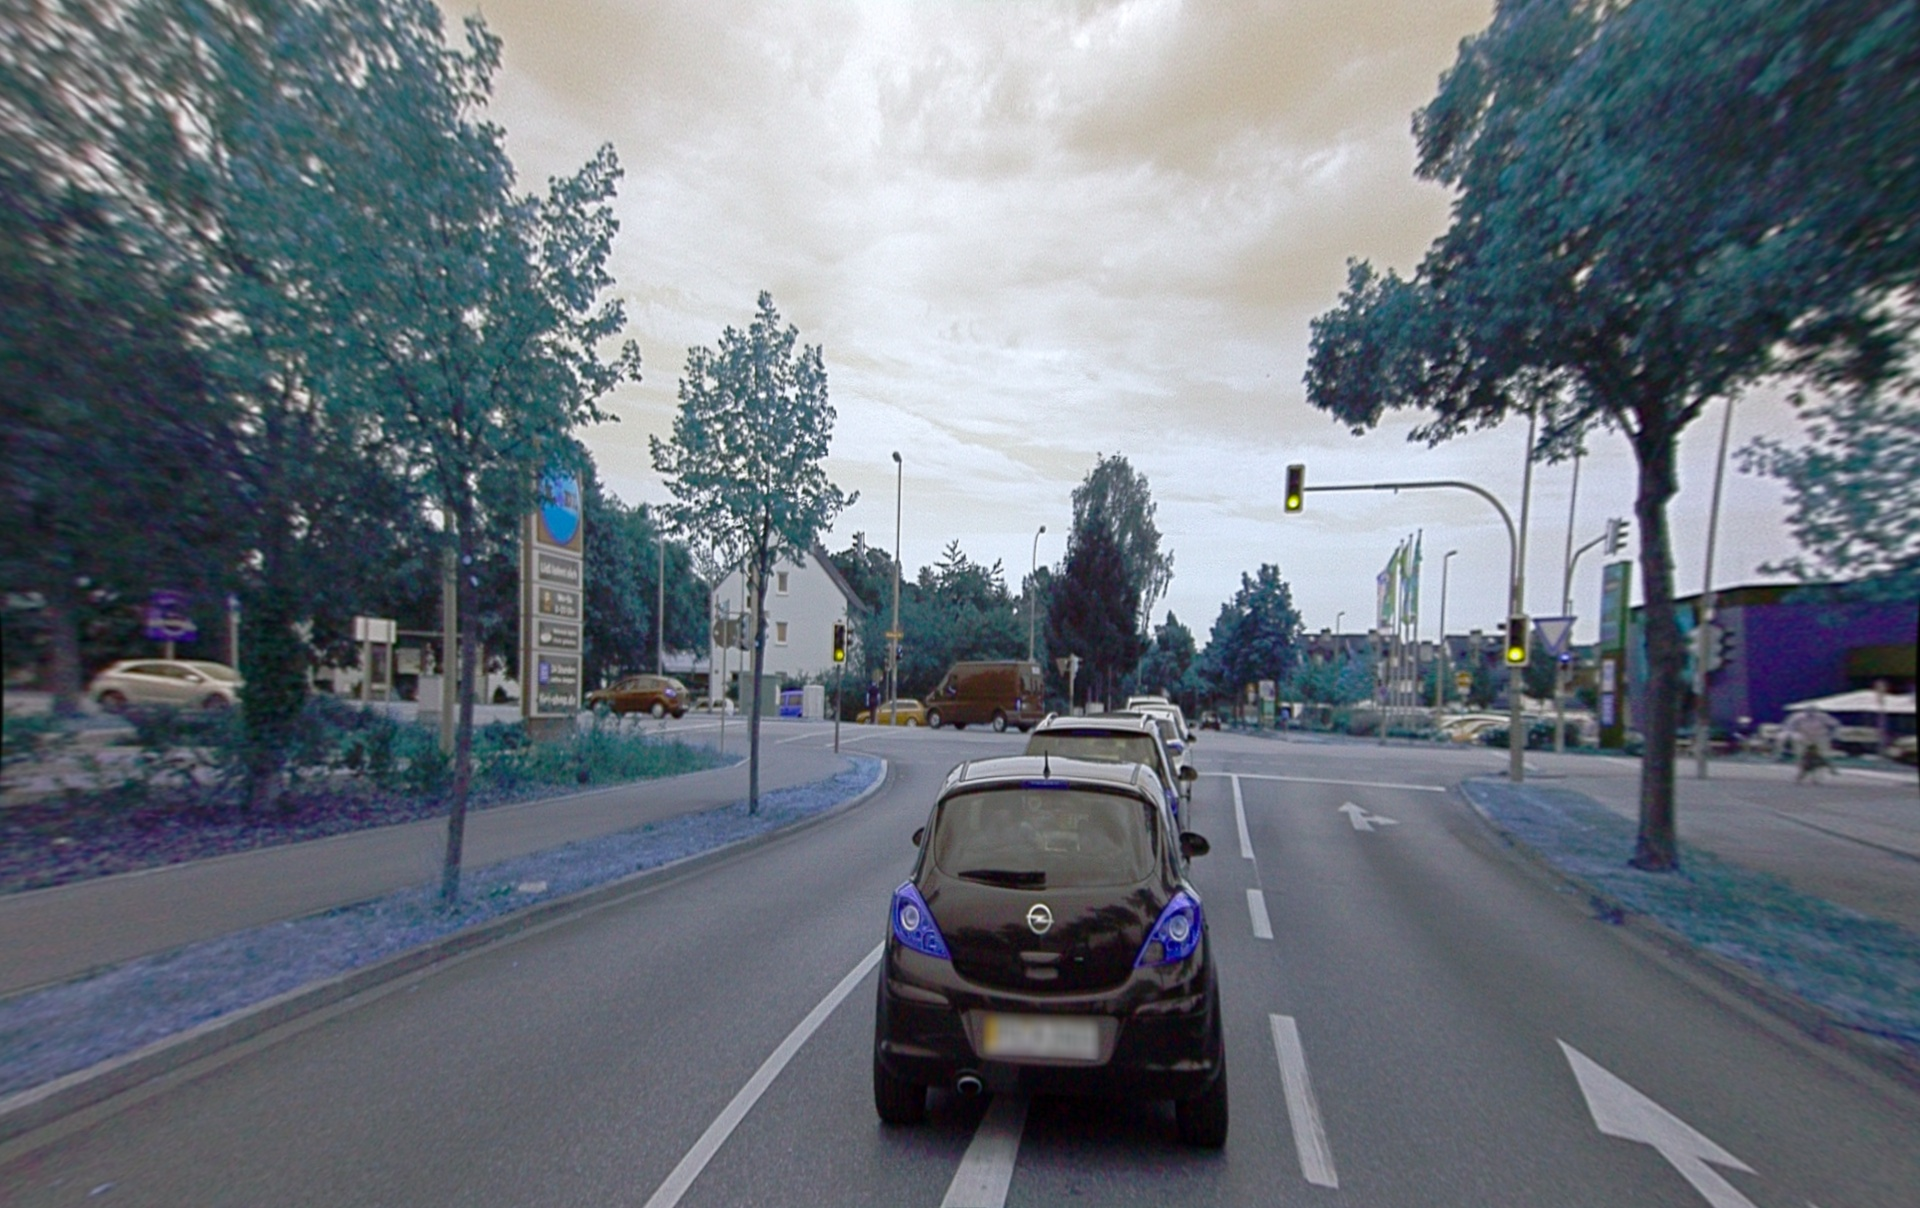

In [8]:
imshow(image)

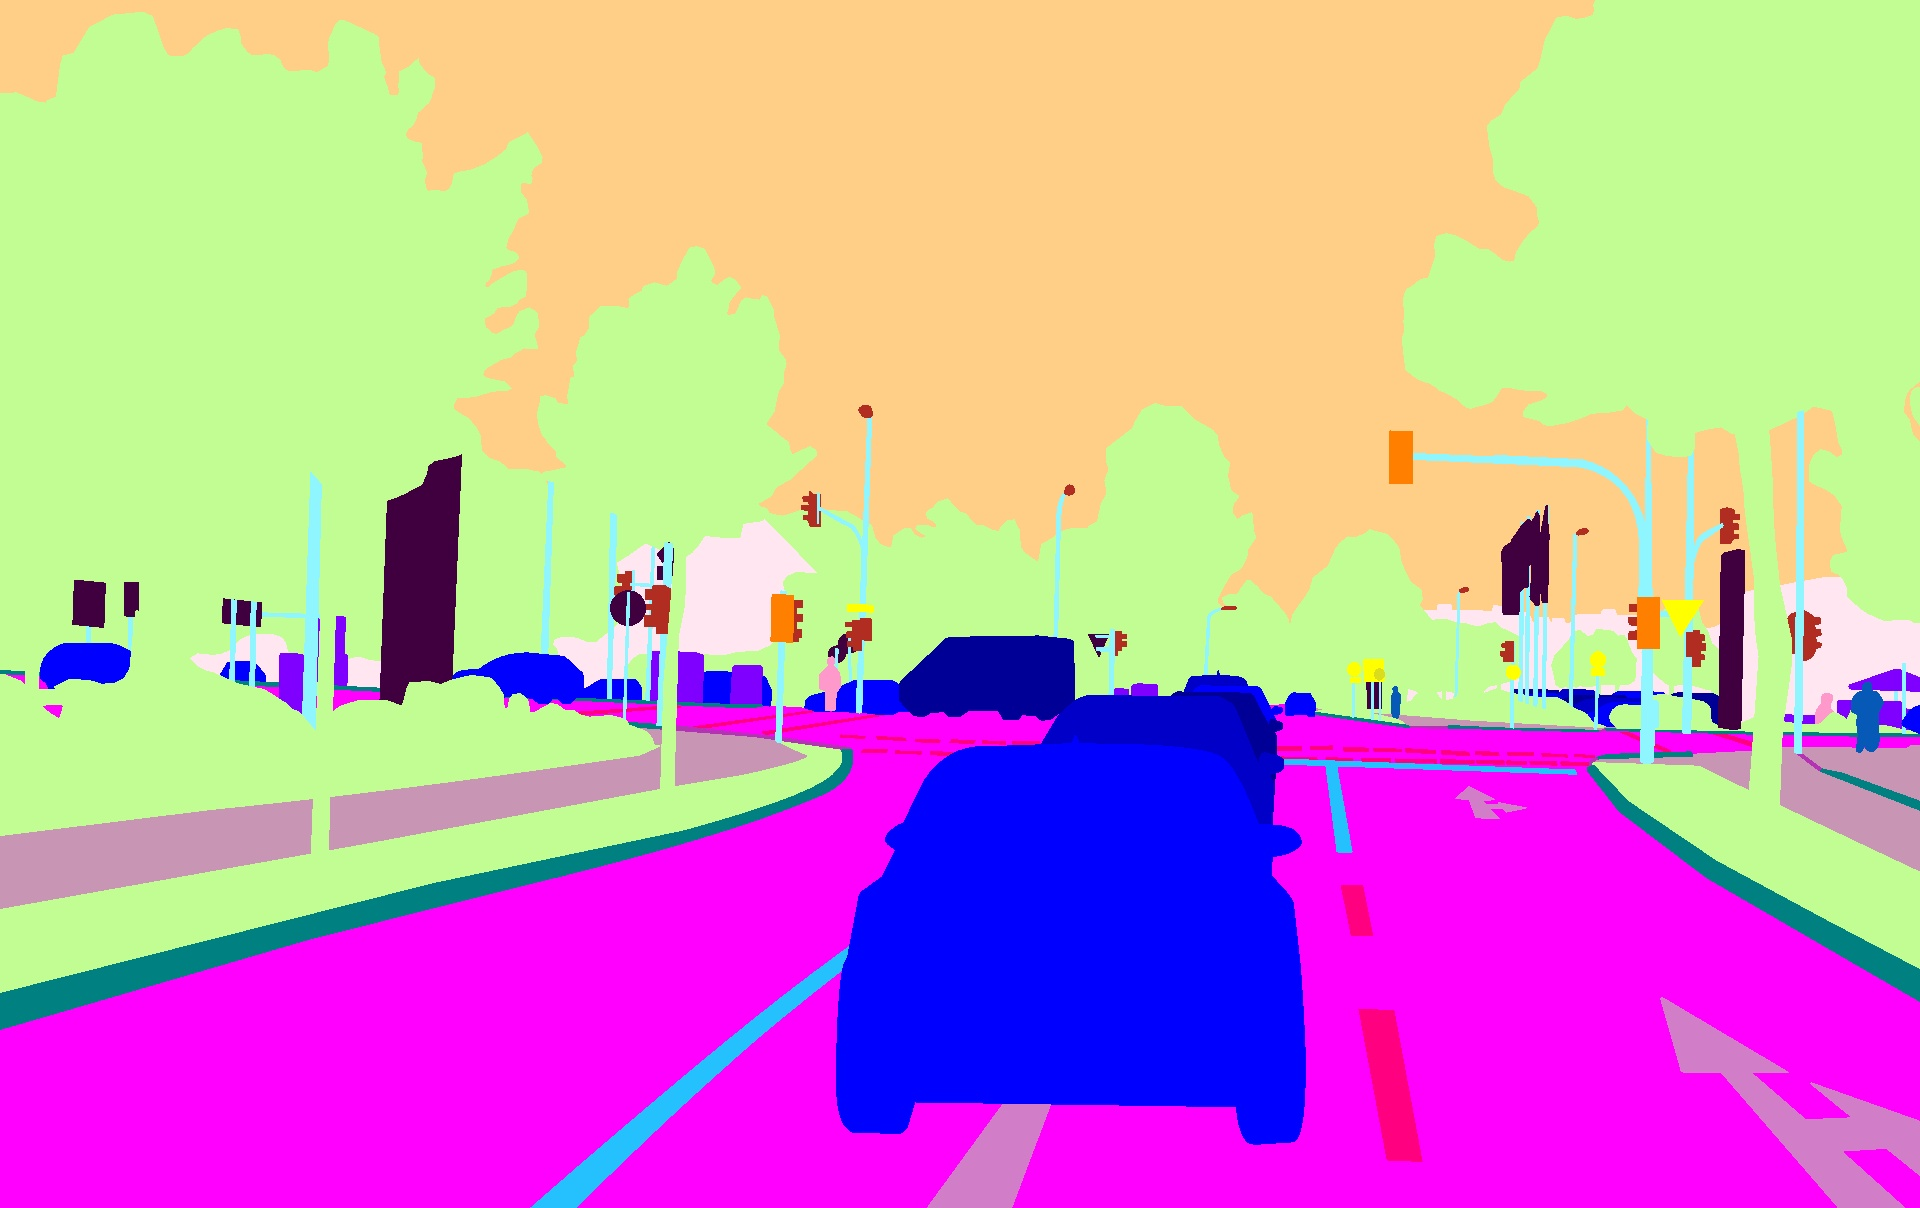

In [9]:
imshow(label)

In [10]:
# my_model.compile()
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
image.shape

(1208, 1920, 3)

In [ ]:
my_model.fit(x=numpy.expand_dims(image, axis=0), y=numpy.expand_dims(label, axis=0))